# A Glance through COCO
## Presented By R.G.

COCO的官网:https://cocodataset.org/    
COCO API : https://github.com/cocodataset/cocoapi

### 以下是 COCO API 的 README

COCO is a large image dataset designed for object detection, segmentation, person keypoints detection, stuff segmentation, and caption generation. This package provides Matlab, Python, and Lua APIs that assists in loading, parsing, and visualizing the annotations in COCO. Please visit http://cocodataset.org/ for more information on COCO, including for the data, paper, and tutorials. The exact format of the annotations is also described on the COCO website. The Matlab and Python APIs are complete, the Lua API provides only basic functionality.

In addition to this API, please download both the COCO images and annotations in order to run the demos and use the API. Both are available on the project website.
-Please download, unzip, and place the images in: coco/images/
-Please download and place the annotations in: coco/annotations/
For substantially more details on the API please see http://cocodataset.org/#download.

After downloading the images and annotations, run the Matlab, Python, or Lua demos for example usage.

To install:
- For Matlab, add coco/MatlabApi to the Matlab path (OSX/Linux binaries provided)
- For Python, run "make" under coco/PythonAPI
- For Lua, run “luarocks make LuaAPI/rocks/coco-scm-1.rockspec” under coco/

https://blog.csdn.net/gzj2013/article/details/82385164

In [1]:
import sys,os
# 配置COCO数据集的路径
COCOPATH = os.path.join(os.getcwd(), 'COCO')
COCOPATH

'/Users/rgmax/Desktop/COCO_ABC/COCO'

In [2]:
os.listdir(COCOPATH)

['image_info_test2017',
 '.DS_Store',
 'val2017',
 'panoptic_annotations_trainval2017',
 'test2017',
 'stuff_annotations_trainval2017',
 'unlabeled2017',
 'annotations_trainval2017',
 'train2017',
 'image_info_unlabeled2017']

In [3]:
COCODIRS = os.listdir(COCOPATH)
try: # 剔除mac自带的.DS_Store文件夹
    COCODIRS.remove('.DS_Store')
except:
    pass
# COCODIRS = [os.path.join(COCOPATH, d) for d in COCODIRS] # 生成完整文件夹路径
COCODIRS = {  # 改用字典比较好访问
    d : os.path.join(COCOPATH, d) for d in COCODIRS
}
COCODIRS

{'image_info_test2017': '/Users/rgmax/Desktop/COCO_ABC/COCO/image_info_test2017',
 'val2017': '/Users/rgmax/Desktop/COCO_ABC/COCO/val2017',
 'panoptic_annotations_trainval2017': '/Users/rgmax/Desktop/COCO_ABC/COCO/panoptic_annotations_trainval2017',
 'test2017': '/Users/rgmax/Desktop/COCO_ABC/COCO/test2017',
 'stuff_annotations_trainval2017': '/Users/rgmax/Desktop/COCO_ABC/COCO/stuff_annotations_trainval2017',
 'unlabeled2017': '/Users/rgmax/Desktop/COCO_ABC/COCO/unlabeled2017',
 'annotations_trainval2017': '/Users/rgmax/Desktop/COCO_ABC/COCO/annotations_trainval2017',
 'train2017': '/Users/rgmax/Desktop/COCO_ABC/COCO/train2017',
 'image_info_unlabeled2017': '/Users/rgmax/Desktop/COCO_ABC/COCO/image_info_unlabeled2017'}

In [4]:
# 构建训练集
train_set = [os.path.join(COCODIRS['train2017'],p) for p in os.listdir(COCODIRS['train2017'])]
train_set[:5]

['/Users/rgmax/Desktop/COCO_ABC/COCO/train2017/000000109622.jpg',
 '/Users/rgmax/Desktop/COCO_ABC/COCO/train2017/000000160694.jpg',
 '/Users/rgmax/Desktop/COCO_ABC/COCO/train2017/000000308590.jpg',
 '/Users/rgmax/Desktop/COCO_ABC/COCO/train2017/000000327573.jpg',
 '/Users/rgmax/Desktop/COCO_ABC/COCO/train2017/000000062929.jpg']

In [5]:
# 为了方便图片直接显示在jupyter中，cv的imshow不能直接在jupyter中显示
# 为了用matplotlib显示（ 不能用plt.show()，要用plt.imshow() ）
# 由于CV的通道是BGR顺序，而matpotlib是 RGB顺序，这里要做通道转换
# 方法一
def bgr2rgb_v2(img):
    # 用cv自带的分割和合并函数
    B,G,R = cv.split(img)
    return cv.merge([R,G,B])
# 方法二
def bgr2rgb(img):
    # 直接用python切片特性，[start: end: step], 这里start end为空，则默认遍历全部，step为-1则倒序遍历
    return img[:, :, ::-1]

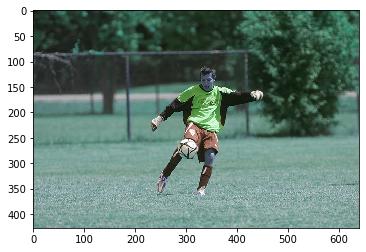

In [6]:
from matplotlib import pyplot as plt
from cv2 import cv2 as cv
img = cv.imread(train_set[1], cv.IMREAD_UNCHANGED) # 随便加载数据集的一张图
# 注意cv的通道顺序和matplotlib的不一样，下面是未转换成RGB顺序
plt.imshow(img)

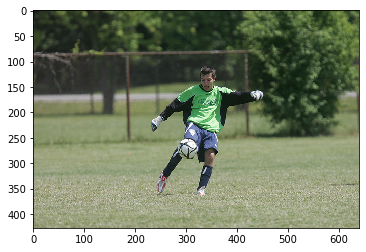

In [7]:
img = bgr2rgb(img)
plt.imshow(img)

## 获取标签信息

In [8]:
os.listdir(COCODIRS['annotations_trainval2017'])

['person_keypoints_val2017.json',
 'captions_val2017.json',
 'instances_val2017.json',
 'person_keypoints_train2017.json',
 'instances_train2017.json',
 'captions_train2017.json']

In [9]:
from pycocotools.coco import COCO
import json
annFile = os.path.join(COCODIRS['annotations_trainval2017'], 'instances_val2017.json')
# with open(annFile,'r') as fp:
#     a = json.load(fp)
# a
coco = COCO(annFile)

loading annotations into memory...
Done (t=0.67s)
creating index...
index created!


In [67]:
coco

In [68]:
# coco.getCatIds()
# coco.getAnnIds()
# coco.getImgIds()

### 下面代码，获取的是所有的 类别信息

In [69]:
categories = coco.loadCats(coco.getCatIds())
categories[:10] # 为了输出美观，这是仅展示10条数据

[{'supercategory': 'person', 'id': 1, 'name': 'person'},
 {'supercategory': 'vehicle', 'id': 2, 'name': 'bicycle'},
 {'supercategory': 'vehicle', 'id': 3, 'name': 'car'},
 {'supercategory': 'vehicle', 'id': 4, 'name': 'motorcycle'},
 {'supercategory': 'vehicle', 'id': 5, 'name': 'airplane'},
 {'supercategory': 'vehicle', 'id': 6, 'name': 'bus'},
 {'supercategory': 'vehicle', 'id': 7, 'name': 'train'},
 {'supercategory': 'vehicle', 'id': 8, 'name': 'truck'},
 {'supercategory': 'vehicle', 'id': 9, 'name': 'boat'},
 {'supercategory': 'outdoor', 'id': 10, 'name': 'traffic light'}]

可以看到`loadCats()`返回了一个list，每条数据为dict类型，包含了数据的 'supercategory'、'id'、'name' 信息 

其中，name为该数据划分的类别（子类），即category的名称

### 单独获取 类别名称（最小类/子类）

In [70]:
names = [cat['name'] for cat in categories]
names[:10]

['person',
 'bicycle',
 'car',
 'motorcycle',
 'airplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light']

In [71]:
catIds = coco.getCatIds(catNms=['person', 'bicycle'])
catIds

[1, 2]

In [72]:
import numpy as np 

In [81]:
catIds = coco.getCatIds(catNms=['person', 'bicycle'])
imgIds = coco.getImgIds(catIds=catIds)
imgIds = coco.getImgIds(catIds=[1])
img_info = coco.loadImgs(imgIds[np.random.randint(0, len(imgIds))])
img_info

[{'license': 3,
  'file_name': '000000567562.jpg',
  'coco_url': 'http://images.cocodataset.org/train2017/000000567562.jpg',
  'height': 450,
  'width': 600,
  'date_captured': '2013-11-21 05:46:40',
  'flickr_url': 'http://farm2.staticflickr.com/1363/4593001211_1732a97da2_z.jpg',
  'id': 567562}]

In [82]:
# img_info = coco.loadImgs(imgIds[np.random.randint(0, len(imgIds))])[0]
img_info = img_info[0]
img_info

{'license': 3,
 'file_name': '000000567562.jpg',
 'coco_url': 'http://images.cocodataset.org/train2017/000000567562.jpg',
 'height': 450,
 'width': 600,
 'date_captured': '2013-11-21 05:46:40',
 'flickr_url': 'http://farm2.staticflickr.com/1363/4593001211_1732a97da2_z.jpg',
 'id': 567562}

In [83]:
imgPath = train_set[train_set.index(os.path.join(COCODIRS['train2017'],'000000567562.jpg'))]
img = cv.imread(imgPath)
img = bgr2rgb(img)

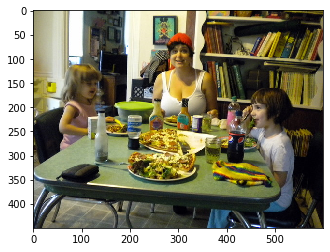

In [84]:
plt.imshow(img)

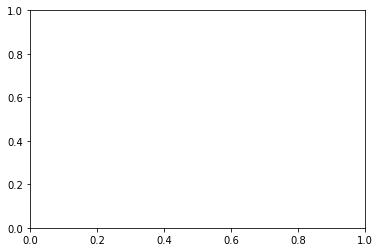

In [85]:
annIds = coco.getAnnIds(imgIds=img_info['id'], catIds=catIds,iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)